# Colab의 cuda version 확인

In [12]:
#colab cuda version 확인
#gpu로 설정 바꿔줘야 보임
#!nvcc -V 로도 확인 가능

!nvidia-smi

Thu Feb 16 12:19:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# tnse 라이브러리에 맞는 cuda version 재설치
- default = 10.2라서 10.2로 재설치
- 삭제하지 않고 재설치하더라도 사용에 무방하여 그렇게 진행

In [ ]:
# install cuda 10.2
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
!apt-get update
!apt-get -y install cuda-10.2

In [24]:
#재설치된 cuda의 버전 확인
#마지막줄 release 옆부분이 현재 cuda version입니다.
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


# libraries

In [19]:
#insatll tsnecuda library
pip install tsnecuda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 MB 2.1 MB/s eta 0:00:00


In [21]:
import tsnecuda
from tsnecuda import TSNE as TSNE_CUDA
from tqdm import trange, tqdm_notebook
import sklearn
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3d 시각화 툴

warnings.filterwarnings(action='ignore')

# tsnecuda 활용하여 차원 축소 진행

In [22]:
# google drive mount <-- local에서 하시는 분들은 생략하셔도 됩니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# 데이터 불러오기 <-- 본인 데이터에 맞게 경로 변경하시면 됩니다.
df=pd.read_csv('/content/drive/MyDrive/신용카드AI/val.csv')
train_df=pd.read_csv('/content/drive/MyDrive/신용카드AI/train.csv')

In [31]:
# 데이터 정규화
scr = StandardScaler()
train_df = scr.fit_transform(train_df)

# 2차원 t-SNE Embedding
# n_components = 2 <-- tsnecuda가 아직 2차원까지만 지원함
tsne_np = TSNE_CUDA(n_components=2, perplexity=50).fit_transform(train_df)

#numpy array -> DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2'])

#데이터 csv로 저장
tsne_df.to_csv('/content/drive/MyDrive/신용카드AI/t-sne yahoo features.csv')

In [41]:
# 데이터 정규화화
scr = StandardScaler()
train_df = scr.fit_transform(train_df)

# 2차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE_CUDA(n_components=2, perplexity=50).fit_transform(train_df)

#numpy array -> DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2'])

#데이터 csv로 저장
#tsne_df.to_csv('/content/drive/MyDrive/신용카드AI/t-sne yahoo features.csv')

# 시각화

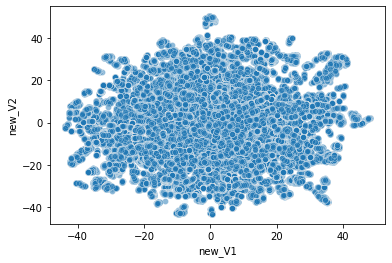

In [39]:
#2차원
sns.scatterplot(x='new_V1',y='new_V2',data=tsne_df,alpha=0.5)